In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from datetime import date

In [ ]:
# Data from https://www.ncsbe.gov/results-data/voter-registration-data
# Downloaded 11/7/25

## Load the Watauga and NC datasets

In [2]:
# Loading the voter registration history

file = 'ncvhis95.txt'

turn_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['voted_party_cd', 'ncid', 'election_lbl'],
    encoding = "latin-1",  
)

turn_df.head()

,election_lbl,voted_party_cd,ncid
0,11/08/2016,UNA,AA107731
1,03/15/2016,REP,AA108729
2,11/08/2022,REP,AA108729
3,11/06/2018,REP,AA108729
4,11/08/2016,REP,AA108729


In [3]:
# Loading the new voter registration's in WAT

file = 'ncvoter95.txt'

wat_df = pd.read_csv(
    file,
    delimiter = "\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year', 'status_cd', 'precinct_desc', 'ncid'],
    encoding="latin-1",  
)

wat_df = wat_df[(wat_df['status_cd'] == 'A') | (wat_df['status_cd'] == 'I') | (wat_df['status_cd'] == 'T')]

wat_df.head()

,ncid,status_cd,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc
0,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2
2,EL93419,A,28604.0,04/11/2017,W,NL,DEM,F,1963,BEECH MOUNTAIN
3,EL94178,I,28607.0,08/24/2017,W,NL,DEM,F,1999,NEW RIVER III
4,EM142921,A,28607.0,10/25/2024,A,NL,UNA,M,2003,NEW RIVER I
5,EH1521146,A,28608.0,08/18/2025,B,UN,DEM,F,2007,BOONE 2


In [4]:
wat_df.count()

ncid             44465
status_cd        44465
zip_code         44461
registr_dt       44465
race_code        44465
ethnic_code      44465
party_cd         44465
gender_code      44465
birth_year       44465
precinct_desc    44371
dtype: int64

In [5]:
merged = pd.merge(wat_df, turn_df, how = 'left', on = 'ncid', indicator = True)

merged.head()

,ncid,status_cd,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc,election_lbl,voted_party_cd,_merge
0,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,11/08/2022,UNA,both
1,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,03/03/2020,DEM,both
2,CG186385,A,28608.0,09/24/2019,U,UN,UNA,U,2001,BOONE 2,11/03/2020,UNA,both
3,EL93419,A,28604.0,04/11/2017,W,NL,DEM,F,1963,BEECH MOUNTAIN,11/06/2018,DEM,both
4,EL93419,A,28604.0,04/11/2017,W,NL,DEM,F,1963,BEECH MOUNTAIN,11/08/2022,DEM,both


In [6]:
merged.count()

ncid              178669
status_cd         178669
zip_code          178654
registr_dt        178669
race_code         178669
ethnic_code       178669
party_cd          178669
gender_code       178669
birth_year        178669
precinct_desc     178565
election_lbl      173107
voted_party_cd    173107
_merge            178669
dtype: int64

In [7]:
merged = merged[merged['registr_dt'] != '##/##/####']
merged['registr_dt'] = pd.to_datetime(merged['registr_dt'])
merged['election_lbl'] = pd.to_datetime(merged['election_lbl'])
merged = merged.set_index('registr_dt')

merged_asc = merged.sort_index(ascending=True)
merged_asc.head(8)

,ncid,status_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc,election_lbl,voted_party_cd,_merge
registr_dt,,,,,,,,,,,,
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,2018-11-06,REP,both
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,2016-03-15,REP,both
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,2016-11-08,REP,both
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,2024-11-05,REP,both
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK,2020-11-03,REP,both
1968-08-02,EL2157,A,28692.0,W,NL,REP,M,1938,BEAVER DAM,2020-11-03,REP,both
1968-08-02,EL2157,A,28692.0,W,NL,REP,M,1938,BEAVER DAM,2024-11-05,REP,both
1968-08-02,EL2157,A,28692.0,W,NL,REP,M,1938,BEAVER DAM,2018-11-06,REP,both


In [8]:
file = 'ncvoter_Statewide.txt'

nc_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'status_cd', 'precinct_desc'],
    encoding="latin-1",   
)

nc_df.count()

/var/folders/h9/j7mkgpm92nv0shny7rh1v93r0000gn/T/ipykernel_83196/764388035.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  nc_df = pd.read_csv(


status_cd        8966557
registr_dt       8966557
race_code        8966557
ethnic_code      8966557
party_cd         8966557
gender_code      8966557
precinct_desc    7600441
dtype: int64

## Clean and filter Watauga dataset

In [9]:
wat_df = wat_df[wat_df['registr_dt'] != '##/##/####']
wat_df['registr_dt'] = pd.to_datetime(wat_df['registr_dt'])
wat_df = wat_df.set_index('registr_dt')

wat_df_asc = wat_df.sort_index(ascending=True)
wat_df_asc.head(8)

,ncid,status_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year,precinct_desc
registr_dt,,,,,,,,,
1964-10-08,EL10632,A,28692.0,W,NL,REP,M,1944,COVE CREEK
1968-08-02,EL2157,A,28692.0,W,NL,REP,M,1938,BEAVER DAM
1968-11-11,EL5757,A,28607.0,W,NL,REP,F,1940,MEAT CAMP
1969-07-12,EL5787,A,28607.0,W,NL,REP,F,1941,MEAT CAMP
1969-07-12,EL5008,A,28692.0,W,NL,DEM,M,1946,COVE CREEK
1969-07-12,EL3370,A,28607.0,W,NL,UNA,M,1938,BLUE RIDGE
1969-07-12,EL4666,A,28698.0,W,NL,DEM,M,1936,COVE CREEK
1969-07-12,EL2654,A,28605.0,W,NL,REP,M,1935,BLOWING ROCK


In [12]:
wat_current = wat_df_asc.loc['2025-08-01':]
wat_past = wat_df_asc.loc['2023-08-01':'2023-11-07']
# percent = (len(wat_past) - len(wat_current)) / len(wat_past)
# print(f'The 2023 Watauga election had a registration count of {len(wat_past)}, while the 2025 election cycle ' +
#       f'had a registration count of {len(wat_current)}; a {percent:.1%} decrease.')

## Clean and filter NC dataset

In [13]:
nc_df = nc_df[nc_df['registr_dt'] != '##/##/####']
nc_df['registr_dt'] = pd.to_datetime(nc_df['registr_dt'])
nc_df = nc_df.set_index('registr_dt')

nc_df_asc = nc_df.sort_index(ascending=True)

In [14]:
nc_current = nc_df_asc.loc['2025-08-01':]
nc_past = nc_df_asc.loc['2023-08-01':'2023-11-07']
# percent = (len(nc_past) - len(nc_current)) / len(nc_past)
# print(f'The 2023 NC election had a new registration count of {len(nc_past)}, while the 2025 election cycle ' +
#       f'had a registration count of {len(nc_current)}; a {percent:.1%} decrease.')

## Explore UNA demographics

<Axes: title={'center': 'NC Race'}>

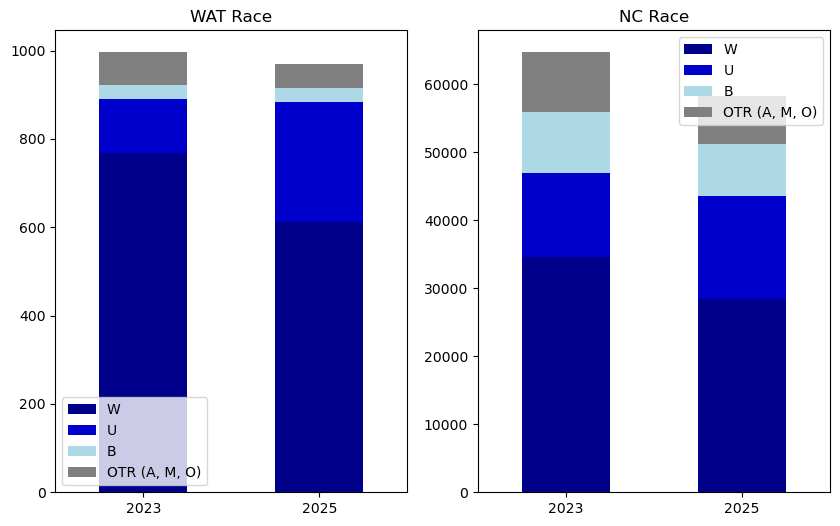

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# Filter WAT and NC data set to just the UNA

una_wat_2025 = wat_current[wat_current['party_cd'] == 'UNA']
una_wat_2023 = wat_past[wat_past['party_cd'] == 'UNA']

una_nc_2025 = nc_current[nc_current['party_cd'] == 'UNA']
una_nc_2023 = nc_past[nc_past['party_cd'] == 'UNA']

# # Break down the race demographics of the WAT UNA during the 2023 election cycle
# # Break down the race demographics of the WAT UNA during the 2025 election cycle

wat_una_race_df = {
    '2023': una_wat_2023['race_code'].value_counts(),
    '2025': una_wat_2025['race_code'].value_counts()
}

wat_race_df = pd.DataFrame(wat_una_race_df)
wat_race = wat_race_df.T
wat_race['OTR (A, M, O)']= wat_race['I'] + wat_race['A'] + wat_race['M'] + wat_race['O']
wat_race = wat_race.drop(['I', 'A', 'M', 'O'], axis = 1)

wat_race.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_race_df = {
    '2023': una_nc_2023['race_code'].value_counts(),
    '2025': una_nc_2025['race_code'].value_counts()
}

nc_race_df = pd.DataFrame(nc_una_race_df)
nc_race = nc_race_df.T
nc_race['OTR (A, M, O)']= nc_race['I'] + nc_race['A'] + nc_race['M'] + nc_race['O'] + nc_race['P']
nc_race = nc_race.drop(['I', 'A', 'M', 'O', 'P'], axis = 1)

nc_race.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)


In [19]:
wat_una_race_df = {
    '2023': una_wat_2023['race_code'].value_counts(),
    '2025': una_wat_2025['race_code'].value_counts()
}

wat_race_df = pd.DataFrame(wat_una_race_df)
wat_race = wat_race_df.T
wat_race['OTR (A, M, O)']= wat_race['I'] + wat_race['A'] + wat_race['M'] + wat_race['O']
wat_race = wat_race.drop(['I', 'A', 'M', 'O'], axis = 1)

wat_race = pd.concat([wat_race, wat_race.pct_change()], ignore_index=True)
wat_race

,W,U,B,"OTR (A, M, O)"
0,769.000000,121.000000,33.000000,73.000000
1,612.000000,272.000000,32.000000,53.000000
2,NaN,NaN,NaN,NaN
3,-0.204161,1.247934,-0.030303,-0.273973


<Axes: title={'center': 'NC Gender'}>

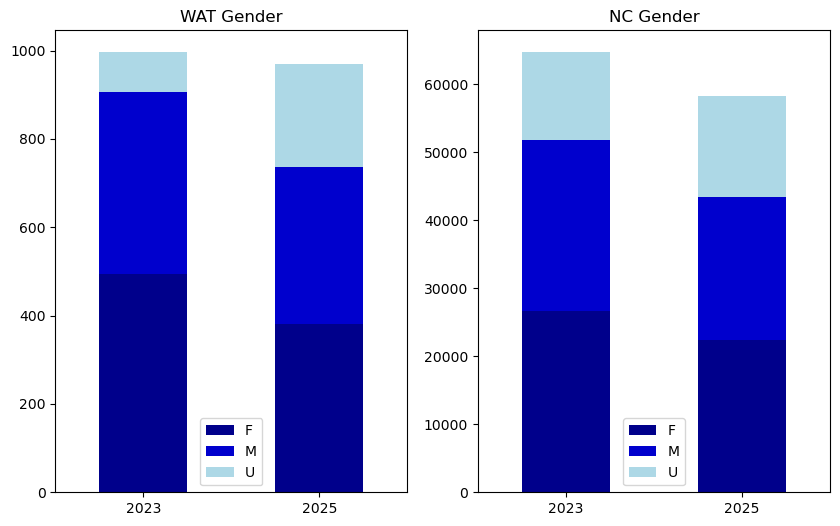

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# # Break down the gender demographics of the WAT UNA during the 2023 election cycle
# # Break down the gender demographics of the WAT UNA during the 2025 election cycle

wat_una_gen_df = {
    '2023': una_wat_2023['gender_code'].value_counts(),
    '2025': una_wat_2025['gender_code'].value_counts()
}

wat_gen_df = pd.DataFrame(wat_una_gen_df)
wat_gen = wat_gen_df.T

wat_gen.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Gender', color = ['DarkBlue', 'MediumBlue', 'LightBlue'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_gen_df = {
    '2023': una_nc_2023['gender_code'].value_counts(),
    '2025': una_nc_2025['gender_code'].value_counts()
}

nc_gen_df = pd.DataFrame(nc_una_gen_df)
nc_gen = nc_gen_df.T

nc_gen.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Gender', color = ['DarkBlue', 'MediumBlue', 'LightBlue'], rot = 0)



In [ ]:
def df_viz(df1, df2, col, past1, past2, current1, current2):
    
    # Filter dataframes by date range desired
    
    df1_past = df1.loc[past1:past2]
    df1_current = df1.loc[current1:current2]
    
    df2_past = df2.loc[past1:past2]
    df2_current = df2.loc[current1:current2]
    
    # creates dataframes based on above filtered data
    
    df1 = {
        f'{df1_past.index.year.unique().item()}': df1_past[col].value_counts(),
        f'{df1_current.index.year.unique().item()}' : df1_current[col].value_counts()
    }
        
    df2 = {
        f'{df2_past.index.year.unique().item()}': df2_past[col].value_counts(),
        f'{df2_current.index.year.unique().item()}' : df2_current[col].value_counts()
    }
    
    # Transform both DataFrames for plotting
    
    df1 = pd.DataFrame(df1)
    df1 = df1.T
    
    df2 = pd.DataFrame(df2)
    df2 = df2.T
    
    # Create plots from above dataframes
    
    fig, axes = plt.subplots(2, 2, figsize = (10, 6))

    df1.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Plot Dist', rot = 0)
    df2.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Plot Dist', rot = 0)
    
    

In [ ]:
df_viz(wat_df_asc, nc_df_asc, 'race_code', '2023-08-01', '2023-11-07', '2025-08-01', '2025-11-07')

## Explore DEM demographics

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

# Filter WAT and NC data set to just the DEM

dem_wat_2025 = wat_current[wat_current['party_cd'] == 'DEM']
dem_wat_2023 = wat_past[wat_past['party_cd'] == 'DEM']

dem_nc_2023 = nc_past[nc_past['party_cd'] == 'DEM']
dem_nc_2025 = nc_current[nc_current['party_cd'] == 'DEM']

# # Break down the race demographics of the WAT UNA during the 2023 election cycle
# # Break down the race demographics of the WAT UNA during the 2025 election cycle

wat_una_race_df = {
    '2023': dem_wat_2023['race_code'].value_counts(),
    '2025': dem_wat_2025['race_code'].value_counts()
}

wat_race_df = pd.DataFrame(wat_una_race_df)
wat_race = wat_race_df.T
wat_race['OTR (A, M, O)']= wat_race['I'] + wat_race['A'] + wat_race['M'] + wat_race['O']
wat_race = wat_race.drop(['I', 'A', 'M', 'O'], axis = 1)

wat_race.plot(ax = axes[0], kind = 'bar', stacked = True, title = 'WAT Race', color = ['DarkBlue', 'MediumBlue', 'LightBlue', 'Grey'], rot = 0)

# # Break down the race demographics of the NC UNA during the 2023 election cycle
# # Break down the race demographics of the NC UNA during the 2025 election cycle

nc_una_race_df = {
    '2023': dem_nc_2023['race_code'].value_counts(),
    '2025': dem_nc_2025['race_code'].value_counts()
}

nc_race_df = pd.DataFrame(nc_una_race_df)
nc_race = nc_race_df.T
nc_race['OTR (A, M, O, P)']= nc_race['I'] + nc_race['A'] + nc_race['M'] + nc_race['O'] + nc_race['P']
nc_race = nc_race.drop(['I', 'A', 'M', 'O', 'P'], axis = 1)

nc_race.plot(ax = axes[1], kind = 'bar', stacked = True, title = 'NC Race', color = ['LightBlue', 'DarkBlue', 'MediumBlue', 'Grey'], rot = 0)



In [ ]:
# Break down the race demographics of the NC DEM during the 2023 election cycle
# Break down the gender demographics of the NC DEM during the 2023 election cycle


# Break down the race demographics of the NC DEM during the 2025 election cycle
# Break down the gender demographics of the NC DEM during the 2025 election cycle


## Group-by-precinct Watauga Dataset

In [ ]:
x = merged_asc.groupby(['precinct_desc', 'election_lbl'], dropna = False)['ncid'].nunique().unstack('election_lbl').iloc[:, -13:]
x


In [ ]:
# def col_count_upto(df, date):
#     return col.loc[:date].count()

# new_df = pd.DataFrame({
#     x: col_count_upto(x[col], "2025-08-01")
#     for col in x.columns
# }, index=["count"])

In [ ]:
#new_df = pd.DataFrame()

#merged_asc.groupby(['precinct_desc', 'election_lbl'], dropna = False)['ncid'].nunique().unstack('election_lbl').iloc[:, -13:]

merged_asc.loc[:'2020-11-03'].groupby('precinct_desc')['ncid'].nunique()

# for col in x.columns:
#     cutoff = pd.to_datetime(col)
#     new_df[col] = [merged_asc[col].loc[:cutoff].count()]